In [1]:
%pylab notebook --no-import-all
%matplotlib notebook
from scipy import stats
from astropy import units as u
from astropy import constants as const
from sympy import *
import decimal as dec

from scipy.optimize import curve_fit
import psalib as pl

init_printing(use_latex=True, use_unicode=True)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# constants
PI     = np.pi
TWO_PI = 2*PI

kB   = const.k_B
R    = const.R
NA   = const.N_A
G    = const.G
g    = const.g0
µ    = 1.317e25 * G
R_E  = 6371 * 1000
h    = const.h
hbar = const.hbar
c    = const.c
m_e  = const.m_e
m_n  = const.m_n
m_p  = const.m_p
R_H  = 2.18e-18 * u.J

In [3]:
def gennoise(N):
    x = np.random.uniform(-1/2, 1/2, N)
    y = np.random.uniform(-1/2, 1/2, N)
    
    return x, y

def piEstimate(x, y):
    r = 0.5 # hardcode for simplicity
    
    s = 0
    
    for i in range(len(x)):
        if ((x[i]**2 + y[i]**2)**(1/2) <= r):
            s += 1
    
    return 4 * (float(s) / float(len(x)))

def build(N):
    
    ret = np.zeros(N)
    
    for i in range(N):
        _x, _y = gennoise(2**(i+1))
        
        pi     = piEstimate(_x, _y)
        delPi  = np.abs(pi - PI) / PI
        
        ret[i] = delPi
    
    return ret

<IPython.core.display.Javascript object>


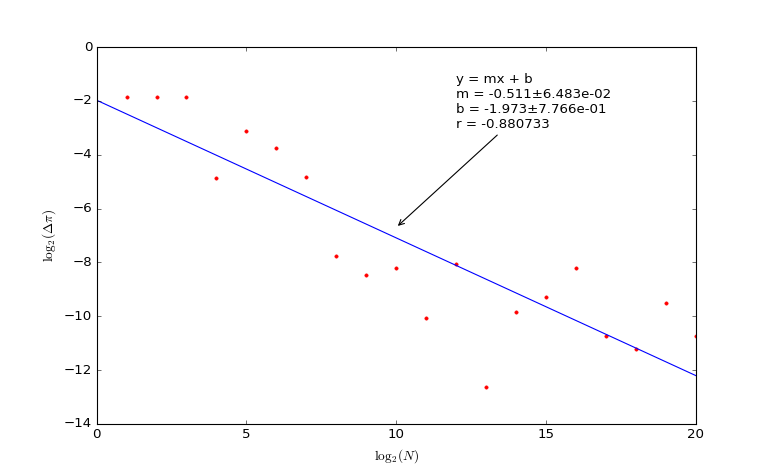

In [12]:
n = 20

n_range = np.arange(start=1, stop=n+1)
diffs   = np.log2(build(n))

m, b, sy, sm, sb, r = pl.lsq(n_range, diffs)

x = np.linspace(0, n, 1000)

plt.plot(n_range, diffs, 'r.')
plt.plot(x, m*x + b, 'b-')

plt.axes().annotate('y = mx + b\nm = %1.3f±%1.3e\nb = %1.3f±%1.3e\nr = %f' % (m, sm, b, sb, r), 
                    xy=(10, -6.7), xycoords='data', 
                    xytext=(12, -3), textcoords='data',
                    arrowprops=dict(arrowstyle='->', facecolor='blue',
                                    connectionstyle='arc3'))

plt.xlabel('$\log_2(N)$')
plt.ylabel('$\log_2(\Delta\pi)$')

<IPython.core.display.Javascript object>


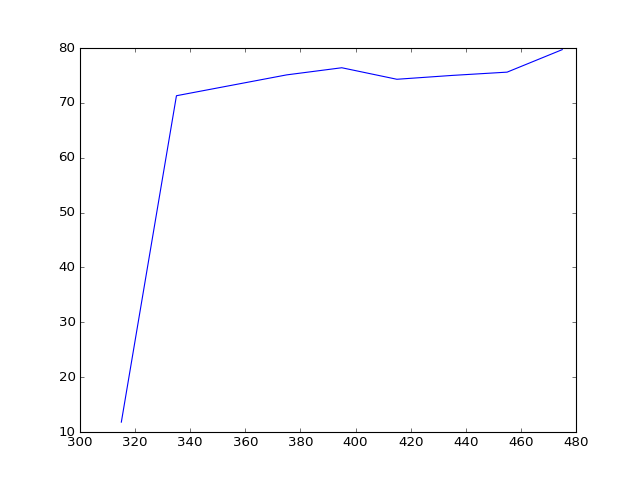

In [14]:
volts = np.array([315, 335, 355, 375, 395, 415, 435, 455, 475])
cps   = np.array([11.8, 71.3, 73.2, 75.1, 76.4, 74.3, 75.0, 75.6, 79.7])

plt.plot(volts, cps)

In [15]:
c = np.array([49, 50, 55, 48, 45])

np.mean(c)

In [16]:
np.sqrt(np.mean(c))

<IPython.core.display.Javascript object>


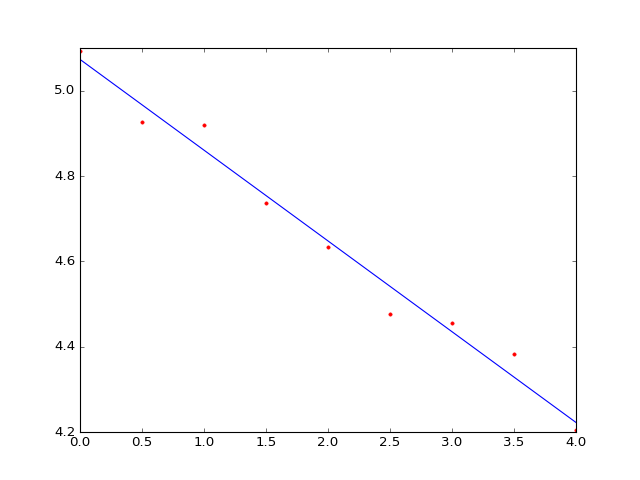

In [19]:
times  = np.array([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0])
counts = np.array([163, 138, 137, 114, 103, 88, 86, 80, 67])

x = np.linspace(0, 4, 1000)

m, b, sy, sm, sb, r = pl.lsq(times, np.log(counts))

plt.plot(times, np.log(counts), 'r.')
plt.plot(x, m*x + b, 'b-')